In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)


In [2]:
# Caminho informado no enunciado
file_path = "/content/sample_data/seeds_dataset.txt"

# Carrega usando separador de espaços
col_names = [
    "area",
    "perimeter",
    "compactness",
    "kernel_length",
    "kernel_width",
    "asymmetry_coeff",
    "groove_length",
    "class"
]

df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=col_names)

df.head()


/tmp/ipython-input-2122882031.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=col_names)


,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,groove_length,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
class_mapping = {
    1: "Kama",
    2: "Rosa",
    3: "Canadian"
}

df["variety"] = df["class"].map(class_mapping)

# Podemos depois usar 'variety' como variável alvo mais legível
df.head()


,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,groove_length,class,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             210 non-null    float64
 1   perimeter        210 non-null    float64
 2   compactness      210 non-null    float64
 3   kernel_length    210 non-null    float64
 4   kernel_width     210 non-null    float64
 5   asymmetry_coeff  210 non-null    float64
 6   groove_length    210 non-null    float64
 7   class            210 non-null    int64  
 8   variety          210 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 14.9+ KB


In [5]:
df.describe()


,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,groove_length,class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [6]:
df.median(numeric_only=True)


,0
area,14.35500
perimeter,14.32000
compactness,0.87345
kernel_length,5.52350
kernel_width,3.23700
asymmetry_coeff,3.59900
groove_length,5.22300
class,2.00000


In [7]:
df.isna().sum()


,0
area,0
perimeter,0
compactness,0
kernel_length,0
kernel_width,0
asymmetry_coeff,0
groove_length,0
class,0
variety,0


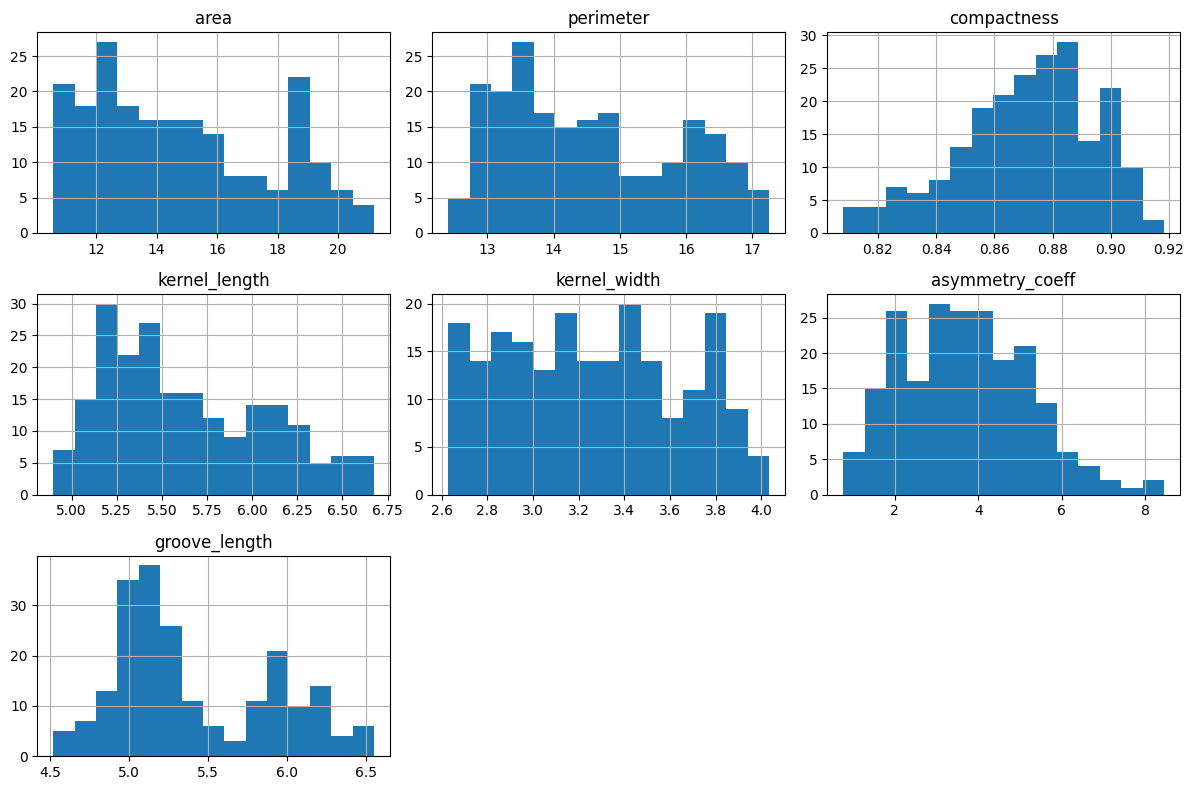

In [8]:
features = [
    "area",
    "perimeter",
    "compactness",
    "kernel_length",
    "kernel_width",
    "asymmetry_coeff",
    "groove_length"
]

df[features].hist(figsize=(12, 8), bins=15)
plt.tight_layout()
plt.show()


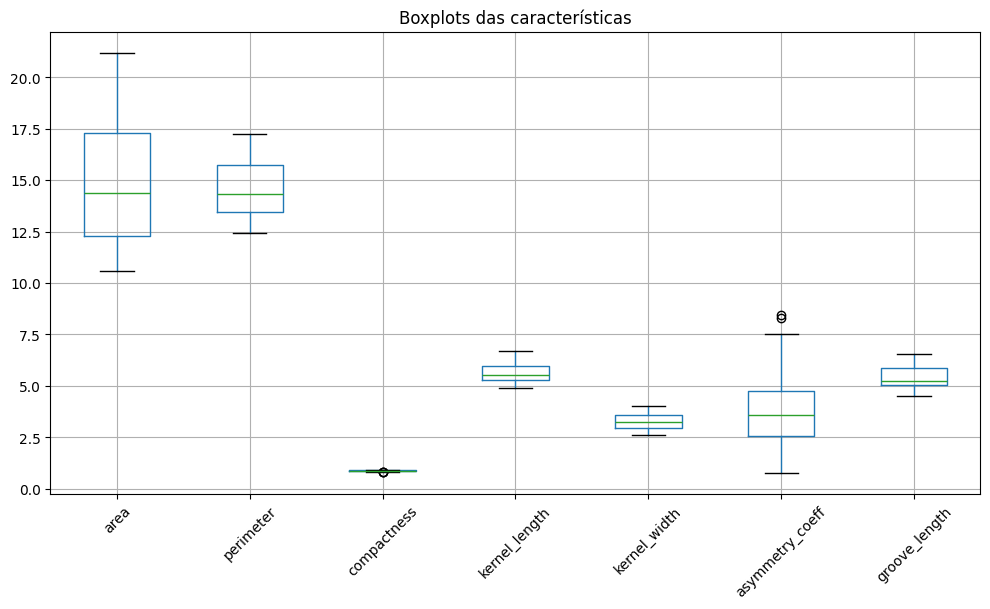

In [9]:
plt.figure(figsize=(12, 6))
df[features].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplots das características")
plt.show()


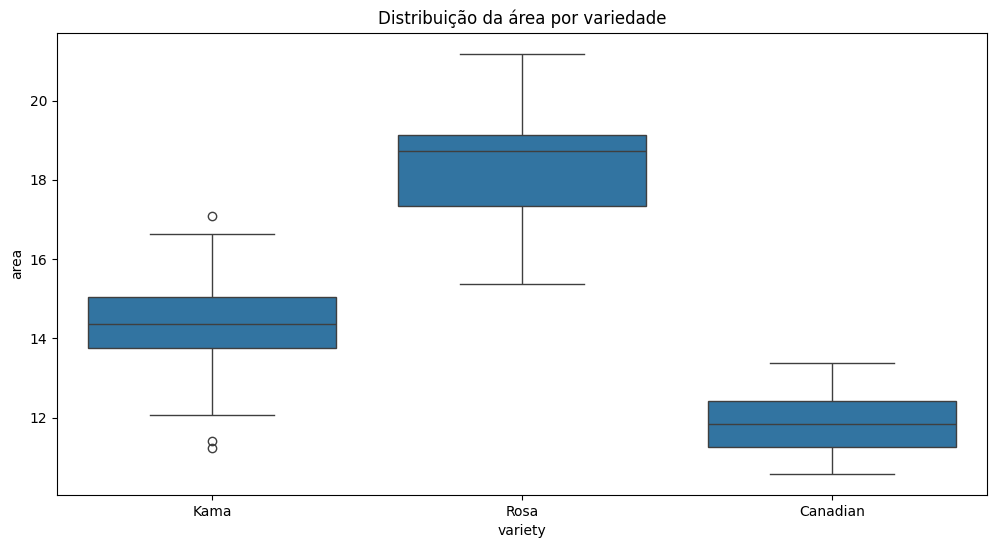

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="variety", y="area")
plt.title("Distribuição da área por variedade")
plt.show()


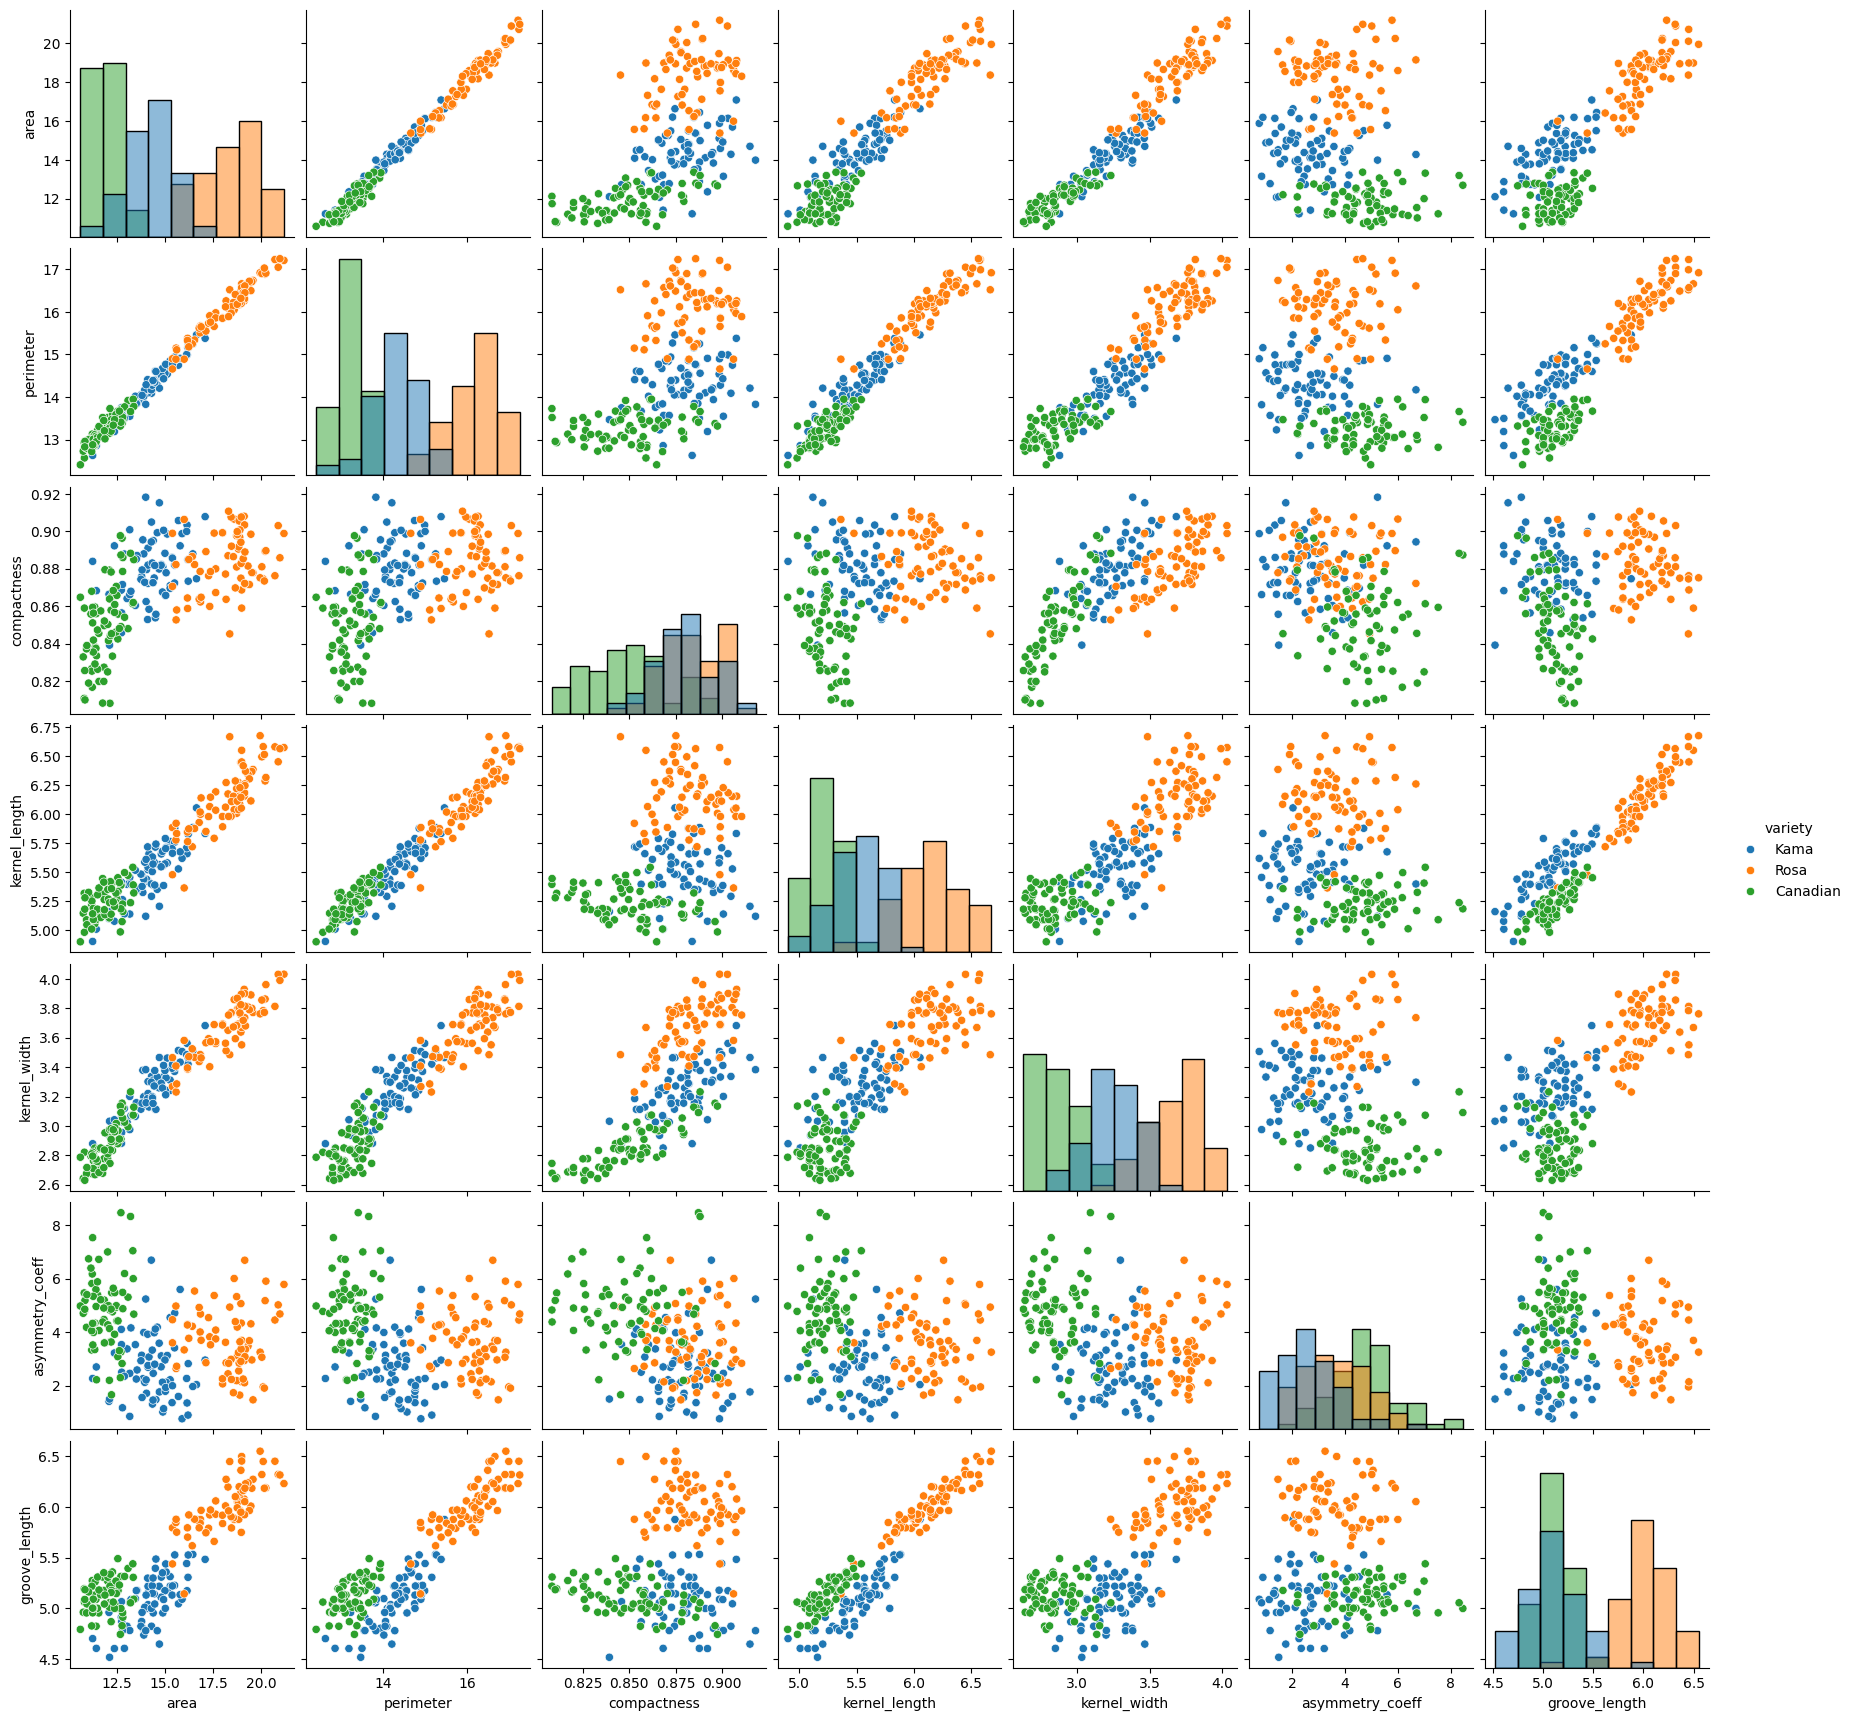

In [11]:
sns.pairplot(df[features + ["variety"]], hue="variety", diag_kind="hist")
plt.show()


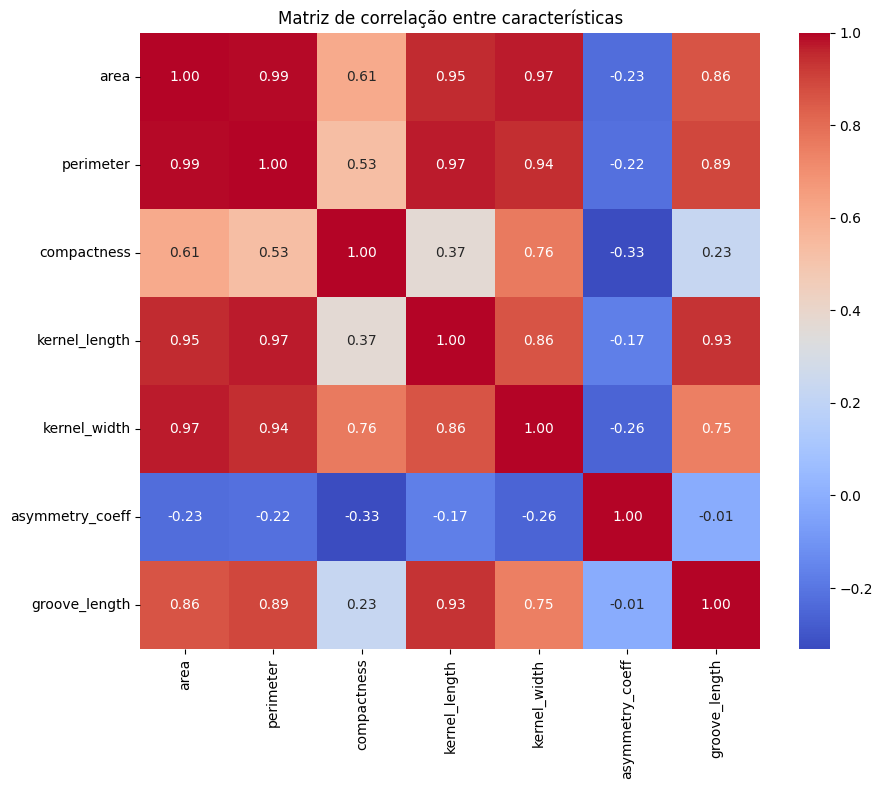

In [12]:
plt.figure(figsize=(10, 8))
corr = df[features].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlação entre características")
plt.show()


In [13]:
X = df[features].values
y = df["variety"].values  # usando os nomes das classes


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # mantém proporção das classes
)


In [15]:
models = {
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier())
    ]),
    "RandomForest": Pipeline([
        # RandomForest não precisa de scaler, mas podemos deixar por consistência
        ("rf", RandomForestClassifier(random_state=42))
    ]),
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("lr", LogisticRegression(max_iter=1000, multi_class="multinomial"))
    ])
}


=== KNN ===
Acurácia: 0.8889

Relatório de Classificação:
              precision    recall  f1-score   support

    Canadian       0.86      0.90      0.88        21
        Kama       0.85      0.81      0.83        21
        Rosa       0.95      0.95      0.95        21

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63



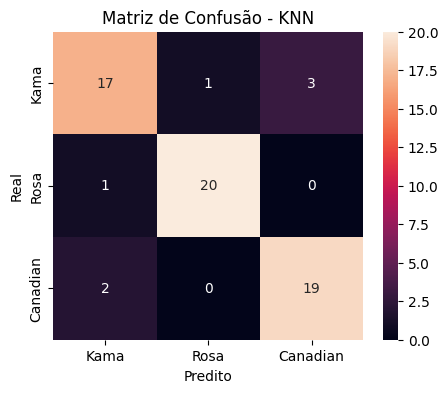

=== RandomForest ===
Acurácia: 0.8413

Relatório de Classificação:
              precision    recall  f1-score   support

    Canadian       0.78      0.86      0.82        21
        Kama       0.79      0.71      0.75        21
        Rosa       0.95      0.95      0.95        21

    accuracy                           0.84        63
   macro avg       0.84      0.84      0.84        63
weighted avg       0.84      0.84      0.84        63



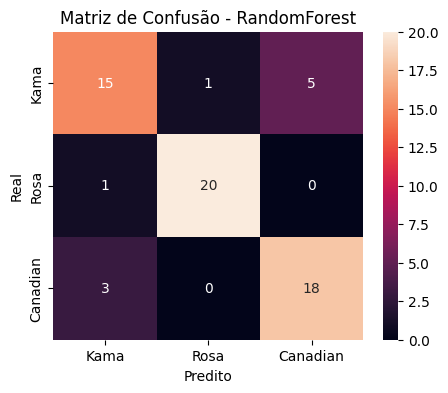

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== LogisticRegression ===
Acurácia: 0.9048

Relatório de Classificação:
              precision    recall  f1-score   support

    Canadian       0.90      0.90      0.90        21
        Kama       0.86      0.86      0.86        21
        Rosa       0.95      0.95      0.95        21

    accuracy                           0.90        63
   macro avg       0.90      0.90      0.90        63
weighted avg       0.90      0.90      0.90        63



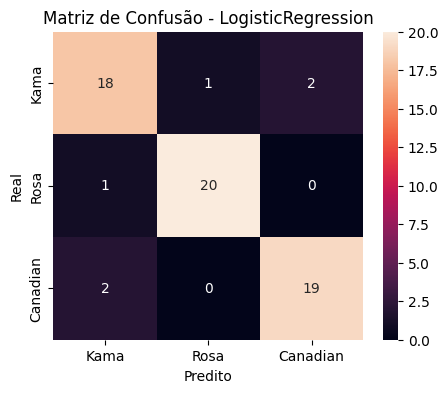

In [16]:
results = {}

for name, model in models.items():
    # Treino
    model.fit(X_train, y_train)

    # Predição
    y_pred = model.predict(X_test)

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"=== {name} ===")
    print(f"Acurácia: {acc:.4f}\n")

    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred, labels=["Kama", "Rosa", "Canadian"])

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Kama", "Rosa", "Canadian"],
                yticklabels=["Kama", "Rosa", "Canadian"])
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusão - {name}")
    plt.show()


In [17]:
results


{'KNN': 0.8888888888888888,
 'RandomForest': 0.8412698412698413,
 'LogisticRegression': 0.9047619047619048}

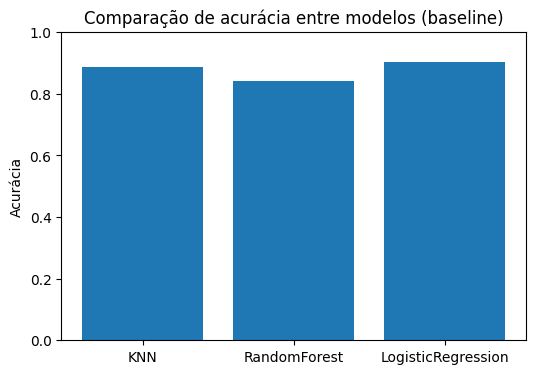

In [18]:
plt.figure(figsize=(6,4))
plt.bar(results.keys(), results.values())
plt.ylim(0, 1)
plt.ylabel("Acurácia")
plt.title("Comparação de acurácia entre modelos (baseline)")
plt.show()


In [19]:
param_grids = {
    "KNN": {
        "knn__n_neighbors": [3, 5, 7, 9],
        "knn__weights": ["uniform", "distance"],
        "knn__metric": ["euclidean", "manhattan"]
    },
    "RandomForest": {
        "rf__n_estimators": [100, 200, 300],
        "rf__max_depth": [None, 5, 10],
        "rf__min_samples_split": [2, 5, 10]
    },
    "LogisticRegression": {
        "lr__C": [0.01, 0.1, 1, 10],
        "lr__solver": ["lbfgs", "newton-cg"],  # para multinomial
        "lr__penalty": ["l2"]
    }
}


In [20]:
best_models = {}
best_scores = {}

for name, pipeline in models.items():
    print(f"===== Grid Search para {name} =====")
    param_grid = param_grids[name]

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=5,
        scoring="accuracy",
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    print("Melhores parâmetros:", grid.best_params_)
    print("Melhor acurácia (validação cruzada):", grid.best_score_)

    best_models[name] = grid.best_estimator_
    best_scores[name] = grid.best_score_

    print()


===== Grid Search para KNN =====
Melhores parâmetros: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
Melhor acurácia (validação cruzada): 0.945977011494253

===== Grid Search para RandomForest =====
Melhores parâmetros: {'rf__max_depth': None, 'rf__min_samples_split': 10, 'rf__n_estimators': 200}
Melhor acurácia (validação cruzada): 0.946206896551724

===== Grid Search para LogisticRegression =====
Melhores parâmetros: {'lr__C': 10, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
Melhor acurácia (validação cruzada): 0.9662068965517241



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== KNN (OTIMIZADO) ===
Acurácia no teste: 0.9048

Relatório de Classificação:
              precision    recall  f1-score   support

    Canadian       0.86      0.90      0.88        21
        Kama       0.86      0.86      0.86        21
        Rosa       1.00      0.95      0.98        21

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.91        63
weighted avg       0.91      0.90      0.91        63



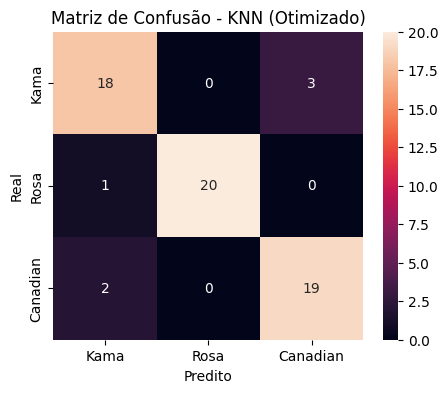

=== RandomForest (OTIMIZADO) ===
Acurácia no teste: 0.8413

Relatório de Classificação:
              precision    recall  f1-score   support

    Canadian       0.78      0.86      0.82        21
        Kama       0.79      0.71      0.75        21
        Rosa       0.95      0.95      0.95        21

    accuracy                           0.84        63
   macro avg       0.84      0.84      0.84        63
weighted avg       0.84      0.84      0.84        63



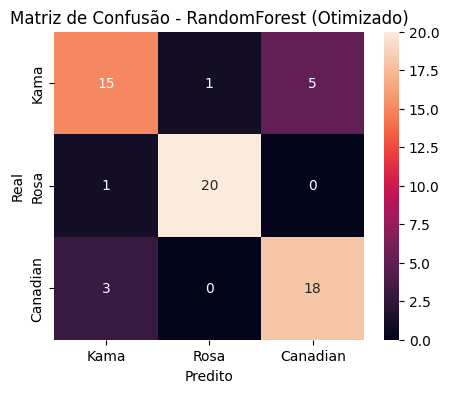

=== LogisticRegression (OTIMIZADO) ===
Acurácia no teste: 0.8889

Relatório de Classificação:
              precision    recall  f1-score   support

    Canadian       0.86      0.90      0.88        21
        Kama       0.85      0.81      0.83        21
        Rosa       0.95      0.95      0.95        21

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63



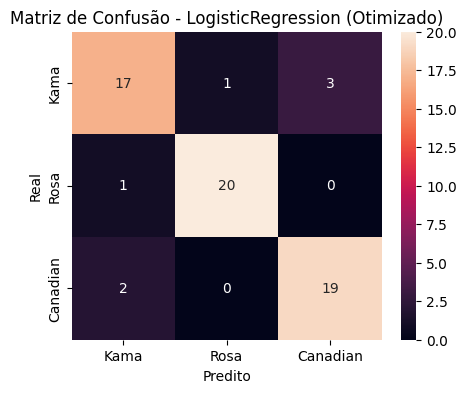

In [21]:
test_results_optimized = {}

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    test_results_optimized[name] = acc

    print(f"=== {name} (OTIMIZADO) ===")
    print(f"Acurácia no teste: {acc:.4f}\n")
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=["Kama", "Rosa", "Canadian"])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Kama", "Rosa", "Canadian"],
                yticklabels=["Kama", "Rosa", "Canadian"])
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusão - {name} (Otimizado)")
    plt.show()


In [22]:
print("Acurácias baseline:", results)
print("Acurácias otimizadas:", test_results_optimized)


Acurácias baseline: {'KNN': 0.8888888888888888, 'RandomForest': 0.8412698412698413, 'LogisticRegression': 0.9047619047619048}
Acurácias otimizadas: {'KNN': 0.9047619047619048, 'RandomForest': 0.8412698412698413, 'LogisticRegression': 0.8888888888888888}
